In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
train_data = pd.read_csv("C:\\Users\\TEST\\Downloads\\train (3).csv")
test_data = pd.read_csv("C:\\Users\\TEST\\Downloads\\test (3).csv")

In [4]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
train_data = train_data.drop(columns=["Name"])
test_data = test_data.drop(columns=["Name"])

train_data["Sex"].replace({'male': 0, 'female': 1})
test_data["Sex"].replace({'male': 0, 'female': 1})





0      1
1      1
2      0
3      0
4      0
      ..
305    0
306    1
307    1
308    0
309    0
Name: Sex, Length: 310, dtype: int64

In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 577 non-null    int64  
 1   Pclass                   577 non-null    int64  
 2   Sex                      577 non-null    int64  
 3   Age                      577 non-null    float64
 4   Siblings/Spouses Aboard  577 non-null    int64  
 5   Parents/Children Aboard  577 non-null    int64  
 6   Fare                     577 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 31.7 KB


In [68]:
train_data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [69]:
y_train = np.asarray(train_data['Survived'].values.tolist()) 
y_test = np.asarray(test_data['Survived'].values.tolist())

train_data = train_data.drop(columns=["Survived"])
test_data = test_data.drop(columns=["Survived"])

X_train = np.asarray(train_data.values.tolist())
X_test = np.asarray(test_data.values.tolist())


print("The shape of the independent fatures are ",X_train.shape)
print("The shape of the dependent fatures are ",y_train.shape)

print("The shape of the independent fatures are ",X_test.shape)
print("The shape of the dependent fatures are ",y_test.shape)


The shape of the independent fatures are  (577, 6)
The shape of the dependent fatures are  (577,)
The shape of the independent fatures are  (310, 6)
The shape of the dependent fatures are  (310,)


In [70]:
y_train = y_train.reshape(len(y_train),1) # Changing the shape from (577,) to (577,1)
y_test = y_test.reshape(len(y_test),1) # Changing the shape from (310,) to (310,1)
print("The shape of the dependent fatures are ",y_train.shape)
print("The shape of the dependent fatures are ",y_test.shape)

The shape of the dependent fatures are  (577, 1)
The shape of the dependent fatures are  (310, 1)


In [71]:
X_train = X_train.T
X_test = X_test.T

y_train = y_train.reshape(1, len(X_train[0]))
y_test = y_test.reshape(1, len(X_test[0]))


print("The shape of the independent fatures are ",X_train.shape)
print("The shape of the dependent fatures are ",y_train.shape)

print("The shape of the independent fatures are ",X_test.shape)
print("The shape of the dependent fatures are ",y_test.shape)


The shape of the independent fatures are  (6, 577)
The shape of the dependent fatures are  (1, 577)
The shape of the independent fatures are  (6, 310)
The shape of the dependent fatures are  (1, 310)


In [86]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def model(X, y, learning_rate, iteration):
    W = np.zeros((X_train.shape[0], 1))
    B = 0
    cost_list = []
    m = X_train.shape[1]
    
    for i in range (iteration):
        L = np.dot(W.T, X_train) + B
        Z = sigmoid(L)
    
        cost = -(1/m)*np.sum(y*np.log(Z) + (1-y)*np.log(1-Z))
    
        dW = (1/m)*np.dot(Z-y, X.T)
        dB = (1/m)*np.sum(Z-y)
    
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
    
        cost_list.append(cost)
    
        if(i%(iteration/10) == 0):
            print("Cost is: ",cost)
    
    return cost_list, W, B



In [92]:
iteration = 100000
learning_rate = 0.00001
cost_list, W, B = model(X_train, y_train, learning_rate = learning_rate, iteration = iteration)



Cost is:  0.6931471805599453
Cost is:  0.6463773043450897
Cost is:  0.6432373011499275
Cost is:  0.6403041630544354
Cost is:  0.6375532362947814
Cost is:  0.6349628851469212
Cost is:  0.6325141767296704
Cost is:  0.6301905809308394
Cost is:  0.6279776907723866
Cost is:  0.6258629660918071


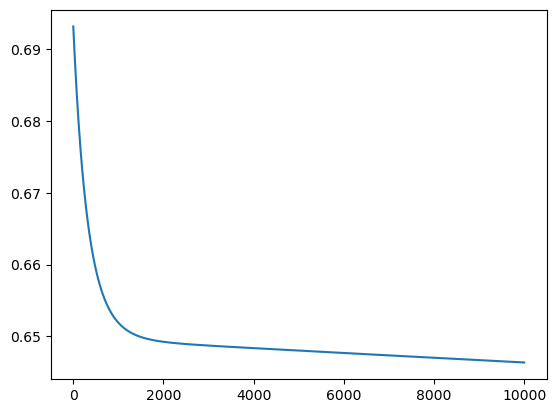

In [91]:
plt.plot(np.arange(iteration), cost_list)